# BDM Exam Project - Part 2

## DOMANDE X PROF:
TASK 4:

PARTE C:
- L'algoritmo di clustering spettrale si costruisce automaticamente la matrice laplaciana, possiamo usarlo o meno? (in ogni caso abbiamo descritto come si creerebbe)
<br>

TASK 5:
- Nel paper non c'è scritto nulla, possiamo usare Knn e decision-tree già scritti o dobbiamo scriverli di nostro? (in task 4 c'è scritto di scriverli da 0, qua no)
- I dati da clusterizzare possiamo già caricarli prima ed eseguire tutte le operazioni man mano?(o preferisce vengano fatti tutti di colpo alla fine (all'inizio del task 5)) (words -> vettorizzazione -> ecc...) (ora come ora facciamo cosi)
- Dizionario può essere da ampliare se usiamo anche dei dati di test (o generiamo uno come merge dei due dati, oppure i dati di train dobbiamo modificarli in modo tale che i valori cadano nel nostro alfabeto) (noi abbiamo scelto il primo metodo anche avendo i dati del task5 vengono generati man mano) è preferibile la seconda?

## TODO:
TASK 0
- [x] DONE

TASK1
- Fixare LDA scrauso, bisogna capire che label passarci dato che è supervisionato!

TASK2
- Implementare Opzione #1
- Implementare Opzione (#2,#3 QUESTE DUE CONTROLLARE SE GIà FUNZIONA), (#4 ANCORA DA IMPLEMENTARE LDA)
- Implementare Opzione #5
- Implementare Opzione #6


TASK3
- punto 1) 4 opzioni di implementazioni co0me nel task2
- NOTA BENE: le 3 parti devono funzionare senza cambiare codice (indifferentemente da cosa abbiamo scelto prima, l'input per la parte 4 DEVE essere sempre lo stesso)

TASK4
- [x] DONE

TASK 5
- [x] DONE


## Imports

In [ ]:
# General utils
import os
import shutil
import numpy as np

# per i plot
import plotly.express as px
import plotly.graph_objects as go
# ---------- ---------- ---------- ---------- ----------

# My general utils
from my_utils import get_files_name
# ---------- ---------- ---------- ---------- ----------

# Task 0
from task0_utils import task0_stats
# Parte A
from task0_utils import generate_alphabet
from task0_utils import update_alphabet
from task0_utils import gesture_2_word
from task0_utils import write_word_as_json
from task0_utils import generate_dizionario_parole_from_gesturewordsdict
# Parte B
from task0_utils import gesture_words_preprocessing
from task0_utils import show_gesture_metrics
# ---------- ---------- ---------- ---------- ----------

# Task 1
from task1_utils import read_gesture_measures_reduced
from task1_utils import metrics_reduced_2_numpy
from task1_utils import metrics_numpy_2_pandas
from task1_utils import metrics_numpy_2_PCA
from task1_utils import metrics_numpy_2_LDA
from task1_utils import metrics_numpy_2_SVD
from task1_utils import get_top_k_latent_features
from task1_utils import prepare_alg_variances_to_plot
# ---------- ---------- ---------- ---------- ----------

# Task 2
from task2_utils import find_k_most_similar
from task2_utils import generate_alg_database
# ---------- ---------- ---------- ---------- ----------

# Task 3
from task3_utils import generate_gestures_similarity_matrix
from task3_utils import gestures_similarity_matrix_2_pandas
from task3_utils import generate_gesture_gesture_svd
from task3_utils import get_top_p_latent_gestures
# ---------- ---------- ---------- ---------- ----------

# Task 4
from task4_utils import cluster_labels_2_pandas
from task4_utils import top_p_gestures_2_numpy
# Parte A
from task4_utils import MyPartitioner
# Parte B
from task4_utils import SimpleKMeans
# Parte C
from task4_utils import spectral_clustering_analyze
from task4_utils import spectral_analisys_results_2_pandas
from task4_utils import spectral_analisys_results_pandas_2_split
from task4_utils import spectral_clustering
# ---------- ---------- ---------- ---------- ----------

# Task 5
from task5_utils import database_numpy_2_supervised_data
from task5_utils import prepare_test_dataframe

from sklearn.preprocessing import StandardScaler
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree classifier
from sklearn import tree
import graphviz 
# ---------- ---------- ---------- ---------- ----------

In [ ]:
# Questi 3 input servono x la parte di classificazione della parte 5, gestiamo questi dati in co-op a quelli di 'train' x semplicità nostra
# Si può facilmente eseguire tutto dopo richiamando in ordine i vari metodi e controllando le scelte fatte in precedenza dall'utente (task 2/3)

In [ ]:
t5_csv_directory = '../Dati_Classificazione/csv/'

In [ ]:
t5_words_directory = '../Dati_Classificazione/words/'

In [ ]:
t5_vectors_directory = '../Dati_Classificazione/vectors/'

## Task 0

In [ ]:
path_csv_directory = '../Dati_2/csv/'

In [ ]:
path_words_directory = '../Dati_2/words/'

In [ ]:
path_vectors_directory = '../Dati_2/vectors/'

Inserire le coordinate che compongono il gesto separate da un trattino:

In [ ]:
input_data_components = 'X-Y-Z-W'

Inserire un valore per R (2R è il numero di simboli dell'alfabeto)

In [ ]:
input_interval_resolution = '5'

In [ ]:
data_components = input_data_components.strip().split("-")
task0_stats["r"] = int(input_interval_resolution.strip())


_RESET_DATA_ = True # se metto false non cancella le directory, se metto true devo rieseguire anche la parte 0 per rigenerare tutto
# Rigenero i vari file path (per words e vectors)
if _RESET_DATA_:
    if os.path.exists(path_words_directory):
        shutil.rmtree(path_words_directory)
    os.makedirs(path_words_directory)
    if os.path.exists(path_vectors_directory):
        shutil.rmtree(path_vectors_directory)
    os.makedirs(path_vectors_directory)

    # Analogo x la parte 5
    if os.path.exists(t5_words_directory):
        shutil.rmtree(t5_words_directory)
    os.makedirs(t5_words_directory)
    if os.path.exists(t5_vectors_directory):
        shutil.rmtree(t5_vectors_directory)
    os.makedirs(t5_vectors_directory)

In [ ]:
# Mi prendo il nome di tutti i files
gesture_files = get_files_name(path_csv_directory + "X/", ext_filter="csv")
alfabeto = generate_alphabet(gesture_files, data_components, path_csv_directory, task0_stats)
# Anche x task 5
t5_gesture_files = get_files_name(t5_csv_directory + "X/", ext_filter="csv")
# FARE MERGE DEI 2
alfabeto = update_alphabet(alfabeto, generate_alphabet(t5_gesture_files, data_components, t5_csv_directory, task0_stats))

In [ ]:
print(alfabeto.simboli)
print(alfabeto.parole)
print("Numero simboli:", alfabeto.n_simboli)
print("Numero parole:", alfabeto.n_parole)

{'0.2882': (0, 0.5763), '-0.2882': (0.0, -0.5763), '0.7334': (0.5763, 0.8904000000000001), '-0.7334': (-0.5763, -0.8904000000000001), '0.937': (0.8904000000000001, 0.9836), '-0.937': (-0.8904000000000001, -0.9836), '0.9911': (0.9836, 0.9986), '-0.9911': (-0.9836, -0.9986), '0.9993': (0.9986, 0.9999), '-0.9993': (-0.9986, -0.9999)}
{'0.2882;0.2882', '0;0.7334', '0;-0.9993', '0.7334;0', '0.937;0', '0.9911;0.9993', '-0.9993;-0.9993', '0.9993;0.937', '-0.7334;-0.937', '-0.2882;-0.2882', '0.937;0.9911', '-0.9911;-0.9911', '0.7334;-0.2882', '0;0', '0.9911;0', '0.9911;0.937', '-0.2882;0.937', '0.9993;0', '0.7334;-0.7334', '0.9911;0.9911', '0.7334;0.7334', '0.7334;0.937', '-0.9993;-0.9911', '-0.2882;0.2882', '0;0.9911', '-0.9911;-0.7334', '0;-0.7334', '0.7334;0.2882', '-0.937;0', '0;-0.937', '-0.937;-0.9911', '0.2882;0.9911', '-0.937;0.937', '-0.7334;0.2882', '-0.937;-0.937', '-0.937;0.2882', '-0.937;-0.2882', '-0.2882;0', '0;0.2882', '0.937;0.7334', '0.9993;0.9911', '0.9911;-0.9911', '-0.2882

### Task 0A

In [ ]:
dizionario_gesti_parole = {}
for gesture_file_name in gesture_files:
    gesture_words_dict = gesture_2_word(gesture_file_name, data_components, alfabeto, path_csv_directory)
    # Salvo solo le info necessarie relative alle parole (come richiesto nel testo)
    dizionario_parole_gesture = generate_dizionario_parole_from_gesturewordsdict(gesture_words_dict)
    dizionario_gesti_parole[gesture_file_name.split(".")[0]] = dizionario_parole_gesture
    # Salvo su file il dizionario completo
    write_word_as_json(gesture_words_dict, gesture_file_name, path_words_directory)
# Anche x task 5
t5_dizionario_gesti_parole = {}
for gesture_file_name in t5_gesture_files:
    gesture_words_dict = gesture_2_word(gesture_file_name, data_components, alfabeto, t5_csv_directory)
    # Salvo solo le info necessarie relative alle parole (come richiesto nel testo)
    dizionario_parole_gesture = generate_dizionario_parole_from_gesturewordsdict(gesture_words_dict)
    t5_dizionario_gesti_parole[gesture_file_name.split(".")[0]] = dizionario_parole_gesture
    # Salvo su file il dizionario completo
    write_word_as_json(gesture_words_dict, gesture_file_name, t5_words_directory)

In [ ]:
#dizionario_gesti_parole['1']

### Task 0B

In [ ]:
# Mi prendo la lista di tutti i file words
words_files = get_files_name(path_words_directory, ext_filter="wrd")
t5_words_files = get_files_name(t5_words_directory, ext_filter="wrd")

# CALCOLARE IL NUMERO DI SENSORI (anche se so che ce ne sono 20, in questo modo rimane più parametrico)
n_sensori = 0
for (_, sensor, word), cont in dizionario_gesti_parole[next(iter(dizionario_gesti_parole))].items():
    sensor = int(sensor)
    if n_sensori > sensor: # ho già ciclato una volta su tutti i sensori, è inutile ricontrollare per le altre coordinate
        break
    if n_sensori < sensor:
        n_sensori = sensor
n_sensori += 1 # Correzione dato che i sensori partono da 0 e a me serve sapere quanti ce ne sono

# Faccio prima poer task5 (così rimane tutto ok)
t0b_preprocessing_settings = {
    'dizionario_gesti_parole': t5_dizionario_gesti_parole,
    'data_components': data_components,
    'words_files': t5_words_files,
    'n_sensori': n_sensori,
    'alfabeto': alfabeto,
    'path_words_directory': t5_words_directory,
    'path_vectors_directory': t5_vectors_directory # mettere a None o a caso se si mette save=False nel metodo
}
# Calcolo TF, IDF, TF-IDF di ogni gesto
t5_gestures_metrics = gesture_words_preprocessing(t0b_preprocessing_settings)

# Eseguo x il nostro dataset
t0b_preprocessing_settings = {
    'dizionario_gesti_parole': dizionario_gesti_parole,
    'data_components': data_components,
    'words_files': words_files,
    'n_sensori': n_sensori,
    'alfabeto': alfabeto,
    'path_words_directory': path_words_directory,
    'path_vectors_directory': path_vectors_directory # mettere a None o a caso se si mette save=False nel metodo
}
# Calcolo TF, IDF, TF-IDF di ogni gesto
gestures_metrics = gesture_words_preprocessing(t0b_preprocessing_settings)

In [ ]:
show_gesture_metrics(gestures_metrics[0])

File gesto: ../Dati_2/words/9.wrd
Numero sensori: 20
TF: (8}
word: 0.2882;0.2882 tf: {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0.3333, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 1.0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0}
word: -0.7334;-0.937 tf: {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0.3333, '18': 0, '19': 0}
word: -0.2882;-0.2882 tf: {'0': 1.0, '1': 1.0, '2': 1.0, '3': 0.3333, '4': 0, '5': 0.3333, '6': 1.0, '7': 0.6667, '8': 0, '9': 0, '10': 1.0, '11': 1.0, '12': 0, '13': 0, '14': 1.0, '15': 1.0, '16': 0, '17': 0, '18': 1.0, '19': 1.0}
word: 0.9911;0.9911 tf: {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0.3333, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0.6667, '13': 0, '14': 0, '15': 0, '16': 0.6667, '17': 0, '18': 0, '19': 0}
word: -0.937;-0.937 tf: {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 

## Task 1

In [ ]:
input_task1_gesti_directory = '../Dati_2/csv/'

In [ ]:
input_task1_data_components = 'X-Y-W-Z'

In [ ]:
input_task1_modello_vettoriale = 'Modello TF-IDF'

In [ ]:
t1_data_components = input_task1_data_components.strip().split("-")
t1_gesture_files = get_files_name(input_task1_gesti_directory + t1_data_components[0] + "/", ext_filter="csv")
# Dovremmo eseguire a tutti questi i 2 metodi gesture_2_word e poi word_2_metrics
# Ma ipotizziamo che siano i dati già calcolati ed evitiamo
t1_gesture_files = [g_file.split(".")[0] for g_file in t1_gesture_files] # mi prendo giusto il nome dei vari files
t5_gesture_files = [g_file.split(".")[0] for g_file in t5_gesture_files] # mi prendo giusto il nome dei vari files

t1_metrics_numpy = []
for gesture_file in t1_gesture_files:
    #path_vectors_directory = ../Dati_2/vectors/
    # Leggo le metrice ridotte
    gesture_metrics_reduced = read_gesture_measures_reduced(gesture_file, path_vectors_directory, input_task1_modello_vettoriale)
    # Trasformo la metrica ridotta in un file numpy
    metrics_numpy = metrics_reduced_2_numpy(gesture_metrics_reduced, alfabeto)
    t1_metrics_numpy.insert(0, (gesture_file, metrics_numpy)) # Salvo, numero gesto, vettore numpy

# Eseguo in modo analogo x task 5
t5_metrics_numpy = []
for gesture_file in t5_gesture_files:
    #path_vectors_directory = ../Dati_2/vectors/
    # Leggo le metrice ridotte
    gesture_metrics_reduced = read_gesture_measures_reduced(gesture_file, t5_vectors_directory, input_task1_modello_vettoriale)
    # Trasformo la metrica ridotta in un file numpy
    metrics_numpy = metrics_reduced_2_numpy(gesture_metrics_reduced, alfabeto)
    t5_metrics_numpy.insert(0, (gesture_file, metrics_numpy)) # Salvo, numero gesto, vettore numpy

len(t1_metrics_numpy) # Dovrebbe stampare 60 se è tutto corretto (1 file x gesto)

60

In [ ]:
input_task1_option = 'PCA'

In [ ]:
t1_metrics_alg = []
alg_variances = []
show_intermediate_data = True
for metrics_numpy in t1_metrics_numpy:
    metrics_pandas = metrics_numpy_2_pandas(metrics_numpy[1], alfabeto)
    alg_result = None
    alg_variance = None
    if input_task1_option == "PCA":
        alg_result, alg_variance = metrics_numpy_2_PCA(metrics_pandas, metrics_numpy[0], show_intermediate_data=show_intermediate_data)
    elif input_task1_option == "SVD":
        alg_result, alg_variance = metrics_numpy_2_SVD(metrics_pandas, metrics_numpy[0], show_intermediate_data=show_intermediate_data)
    else:
        alg_result, alg_variance = metrics_numpy_2_LDA(metrics_pandas, metrics_numpy[0], show_intermediate_data=show_intermediate_data)

    alg_variances.insert(0, (alg_result['document'], alg_variance))
    t1_metrics_alg.insert(0, alg_result)
    if show_intermediate_data:
        show_intermediate_data = False

t5_metrics_alg = []
t5_alg_variances = []
for metrics_numpy in t5_metrics_numpy:
    metrics_pandas = metrics_numpy_2_pandas(metrics_numpy[1], alfabeto)
    alg_result = None
    alg_variance = None
    if input_task1_option == "PCA":
        alg_result, alg_variance = metrics_numpy_2_PCA(metrics_pandas, metrics_numpy[0])
    elif input_task1_option == "SVD":
        alg_result, alg_variance = metrics_numpy_2_SVD(metrics_pandas, metrics_numpy[0])
    else:
        alg_result, alg_variance = metrics_numpy_2_LDA(metrics_pandas, metrics_numpy[0])

    t5_alg_variances.insert(0, (alg_result['document'], alg_variance))
    t5_metrics_alg.insert(0, alg_result)

,PC1,PC2,PC3,PC4
0.2882;0.2882,1.017011e-03,3.536540e-03,3.902739e-03,2.289838e-03
0;0.7334,5.056482e-17,1.980650e-16,3.199556e-16,2.845516e-16
0;-0.9993,7.416298e-17,1.261461e-16,7.511274e-17,4.223844e-17
0.7334;0,9.731304e-18,1.734025e-17,3.746052e-17,4.833203e-17
0.937;0,5.555642e-17,1.975539e-17,1.094212e-16,3.399999e-17
...,...,...,...,...
-0.9993;0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0.2882;0.7334,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
-0.9911;-0.937,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0.9993;0.9993,3.609397e-02,6.898657e-01,1.242685e-01,1.376059e-01



PC1 top 10 features are: 



['-0.7334;-0.937:     0.977998',
 '-0.7334;-0.7334:     0.198171',
 '0.9911;0.9911:     0.041971',
 '0.9993;0.9993:     0.036094',
 '-0.937;-0.937:     0.023853',
 '-0.2882;-0.2882:     0.018402',
 '0.937;0.937:     0.016585',
 '0.2882;0.2882:     0.001017',
 '0;-0.9993:     0.0',
 '0.9911;0.9993:     0.0']

In [ ]:
fig = px.scatter(prepare_alg_variances_to_plot(alg_variances), x="component", y="variance", color="document", trendline="rolling", trendline_options=dict(function="median", window=5), trendline_scope='overall',
            labels={"component": "# Components", "variance": "Explained Variance", "document": "Gesture"}, 
            title="Explained Variance with increasing number of latent features")
fig.update_traces(showlegend=True)
fig.show()

In [ ]:
t1_top_k_latent_features = '2'

In [ ]:
t1_top_k_latent_features = int(t1_top_k_latent_features)
top_k_features = get_top_k_latent_features(t1_metrics_alg[0], t1_top_k_latent_features)
top_k_features

[{'PC1': [('0.9911;0.9911', 0.7373),
   ('0.9993;0.9993', 0.6429),
   ('-0.937;-0.937', 0.1739),
   ('-0.7334;-0.7334', 0.0771),
   ('0.937;0.937', 0.0611),
   ('-0.2882;-0.2882', 0.0559),
   ('0.2882;0.2882', 0.002),
   ('-0.9911;-0.937', 0.0),
   ('0.2882;0.7334', 0.0),
   ('-0.9993;0', 0.0),
   ('0;0.937', 0.0),
   ('0;0.9993', 0.0),
   ('-0.7334;0.7334', 0.0),
   ('-0.9911;0', 0.0),
   ('0;-0.9911', 0.0),
   ('0.9911;0.2882', 0.0),
   ('0.2882;0.937', 0.0),
   ('0.2882;-0.2882', 0.0),
   ('-0.9911;-0.9993', 0.0),
   ('0.7334;-0.937', 0.0),
   ('0.937;-0.9911', 0.0),
   ('-0.937;-0.7334', 0.0),
   ('0.2882;-0.7334', 0.0),
   ('-0.7334;-0.2882', 0.0),
   ('-0.2882;-0.7334', 0.0),
   ('0.9911;-0.9911', 0.0),
   ('0.9993;0.9911', 0.0),
   ('0.937;0.7334', 0.0),
   ('0;0.2882', 0.0),
   ('-0.2882;0', 0.0),
   ('-0.937;-0.2882', 0.0),
   ('-0.937;0.2882', 0.0),
   ('-0.7334;0.2882', 0.0),
   ('-0.937;0.937', 0.0),
   ('0.2882;0.9911', 0.0),
   ('-0.937;-0.9911', 0.0),
   ('0;-0.937', 0.0

## Task 2

In [ ]:
# Genero il dataset dalla metrica scelta dall'algoritmo di prima
# Dizionario composto da 'gestures', lista delle gestures in ordine, 'np_database', tf/tfidf delle varie gesture in formato numpy
alg_database = generate_alg_database(t1_metrics_alg)
t5_alg_database = generate_alg_database(t5_metrics_alg)

 Scrivere un programma che, dato un file di gesti, individui i 10 gesti piu’ simili nel database di gesti, 
utilizzado:

In [ ]:
t2_input_file_gestures = '../Dati_2/words/1.wrd'

In [ ]:
t2_input_k_gestures = '10'

In [ ]:
t2_input_k_latent_features = '4'

In [ ]:
t2_input_query_type = 'Top-K Semantiche Latenti'

In [ ]:
# X facilità so che già ho calcolato sto file in input e lo prendo dal database
gesture_name_id = t2_input_file_gestures.split("/")[-1].split(".")[0]

query_type = t2_input_query_type

top_k = None
if query_type == 'Dot Product':
    print("Dot product not implemented yet!")
elif query_type == 'Top-K Semantiche Latenti':
    gesture_numpy = alg_database['np_database'][alg_database['gestures'].index(gesture_name_id)]
    # Preparo la query con gli input scelti dall'utente
    finder_query_settings = {
        'k_latent_features': int(t2_input_k_latent_features),
        'k_gestures_return': int(t2_input_k_gestures),
    }
    top_k = find_k_most_similar(alg_database, gesture_numpy, finder_query_settings)
elif query_type == 'Edit Distance':
    print("Edit Distance not implemented yet!")
else:
    print("Distanza DTW not implemented yet!")


if top_k is not None:
    print("Top " + t2_input_k_gestures + " gestures più simili a '" + t2_input_file_gestures + "', usando '" + query_type + "':")
    print(top_k)

Top 10 gestures più simili a '../Dati_2/words/1.wrd', usando 'Top-K Semantiche Latenti':
  gesture  similarity
0       1    1.000000
1       3    0.711436
2       5    0.437160
3       4    0.431421
4       8    0.430209
5      38    0.428718
6       2    0.425327
7      57    0.389737
8      14    0.388339
9      55    0.347573


## Task 3

In [ ]:
t3_input_query_type = 'Top-K Semantiche Latenti'

In [ ]:
query_type = t3_input_query_type

# Creo la matrice di similarità gesture - gesture (in base a come ha scelto l'utente di procedere)
gesture_sim_matrix = None
if query_type == 'Dot Product':
    #gesture_sim_matrix = generate_gestures_similarity_matrix(alg_database['np_database'], int(t2_input_k_latent_features))
    print("Dot product not implemented yet!")
elif query_type == 'Top-K Semantiche Latenti':
    gesture_sim_matrix = generate_gestures_similarity_matrix(alg_database['np_database'], int(t2_input_k_latent_features))
elif query_type == 'Edit Distance':
    #gesture_sim_matrix = generate_gestures_similarity_matrix(alg_database['np_database'], int(t2_input_k_latent_features))
    print("Edit Distance not implemented yet!")
else:
    #gesture_sim_matrix = generate_gestures_similarity_matrix(alg_database['np_database'], int(t2_input_k_latent_features))
    print("Distanza DTW not implemented yet!")

# La trasformo in dataframe pandas (così ho anche il nome delle gestures a confronto nelle righe / colonne)
gestures_sim_matrix_pd = gestures_similarity_matrix_2_pandas(gesture_sim_matrix, alg_database['gestures'])
print("Matrice similarità gesture-gesture:")
gestures_sim_matrix_pd

Matrice similarità gesture-gesture:


,1,10,11,12,13,14,15,16,17,18,...,55,56,57,58,59,6,60,7,8,9
1,1.000000,0.148063,0.342360,0.168793,0.230220,0.388339,0.245057,0.267177,0.234282,0.196297,...,0.347573,0.091031,0.389737,0.080890,0.049686,0.188952,0.122513,0.290202,0.430209,0.269765
10,0.148063,1.000000,0.242890,0.301018,0.186758,0.314446,0.081697,0.178233,0.303591,0.355100,...,0.160221,0.048845,0.136926,0.203366,0.072307,0.329164,0.143454,0.198462,0.266815,0.311622
11,0.342360,0.242890,1.000000,0.197663,0.103106,0.369881,0.274924,0.267358,0.164627,0.084860,...,0.122613,0.054921,0.219453,0.041919,0.000000,0.211742,0.068522,0.199714,0.351420,0.132318
12,0.168793,0.301018,0.197663,1.000000,0.293326,0.430417,0.122587,0.195258,0.379427,0.301774,...,0.117780,0.064299,0.120695,0.096161,0.030787,0.235666,0.155713,0.107637,0.283629,0.315264
13,0.230220,0.186758,0.103106,0.293326,1.000000,0.265292,0.175172,0.166895,0.429360,0.474081,...,0.230860,0.114355,0.166667,0.097794,0.050894,0.397404,0.174715,0.302071,0.427432,0.471901
14,0.388339,0.314446,0.369881,0.430417,0.265292,1.000000,0.274361,0.309338,0.487142,0.404317,...,0.180755,0.065100,0.233435,0.095185,0.041730,0.218736,0.217629,0.282781,0.586002,0.409202
15,0.245057,0.081697,0.274924,0.122587,0.175172,0.274361,1.000000,0.394632,0.206557,0.160398,...,0.204695,0.142644,0.336671,0.127230,0.084035,0.183530,0.098138,0.438787,0.261918,0.151011
16,0.267177,0.178233,0.267358,0.195258,0.166895,0.309338,0.394632,1.000000,0.146184,0.154920,...,0.075134,0.016425,0.220319,0.009604,0.010788,0.157496,0.000000,0.310601,0.249200,0.083023
17,0.234282,0.303591,0.164627,0.379427,0.429360,0.487142,0.206557,0.146184,1.000000,0.552301,...,0.526181,0.239564,0.199284,0.153302,0.164522,0.398053,0.352647,0.256734,0.460159,0.506064
18,0.196297,0.355100,0.084860,0.301774,0.474081,0.404317,0.160398,0.154920,0.552301,1.000000,...,0.194790,0.073130,0.175174,0.226373,0.057990,0.378328,0.321725,0.299426,0.434961,0.341341


In [ ]:
# Faccio svd con 60 componenti (e poi mi prendo solo quelle che servono)
n_components = 59
svd_latent_gestures, svd_variance = generate_gesture_gesture_svd(gestures_sim_matrix_pd, n_components=n_components)

In [ ]:
t3_query_top_p = '5'

In [ ]:
t3_query_top_p = int(t3_query_top_p)
# Input value check
if t3_query_top_p < 1:
    t3_query_top_p = 1
elif t3_query_top_p > n_components:
    t3_query_top_p = n_components

# Tiro fuori le top p gestures latenti
top_p_gestures = get_top_p_latent_gestures(svd_latent_gestures, t3_query_top_p)
#top_p_gestures

## Task 4

In [ ]:
t4_p_partitions = '3'

In [ ]:
t4_p_partitions = int(t4_p_partitions)
# Input value check
if t4_p_partitions < 1:
    t4_p_partitions = 1

### Task 4A

Partizionamento top_p_gestures in base ai loro gradi di appartenenza alle p semantiche

In [ ]:
# Preparo i dati

# Dati reali (le top p gestures appena calcolate)
# Essendo le top p gestures in un 'formato strano' le traduco in un array numpy (sono una lista di dizionari di liste)
X_train = top_p_gestures_2_numpy(top_p_gestures, t3_query_top_p)
X_test = [X_train[0]] # Prendo un dato a caso giusto x testare la predict
#X_test = [np.array([0.5, 0.2, 0.3, 0.7, 0.1])] # Un esempio a caso deve avere p dimensioni (se non presente fra i dati deve dare None)

# Semplice esempio di test su 2 dimensioni
#X_train = [np.array([1, 1]), np.array([2, 2]), np.array([3, 3]), np.array([4, 1]), np.array([1, 2]), np.array([-1, -2]), np.array([5, 2])]
#X_test = [np.array([4, 1]), np.array([4, 2])]

In [ ]:
# Creo e fitto il partizionatore selezionando t4_p_partitions come numero di gruppi da creare
partitioner = MyPartitioner(t4_p_partitions, max_iterations=5)
partitioner.fit(X_train)
#partitioner.fit(gesture_sim_matrix)
print("Dimensione spazio:", partitioner.groups_space_dimension)
print("Gruppi:\n", partitioner.groups)

Dimensione spazio: 8.11853962584625
Gruppi:
 {0: {'size': 2.7237317674185118, 'conditions': [(0.0737, 0.1673), (0.0031, 0.2592), (0.0017, 0.227), (0.0075, 0.2599), (0.002, 0.2941)], 'elements': [[0.0892, 0.1218, 0.0798, 0.024, 0.2941], [0.1449, 0.0031, 0.227, 0.0632, 0.148], [0.1224, 0.1361, 0.0502, 0.0824, 0.1451], [0.1131, 0.1353, 0.1097, 0.1524, 0.0539], [0.1618, 0.0075, 0.0264, 0.043, 0.1725], [0.0737, 0.1443, 0.1657, 0.008, 0.0595], [0.1082, 0.0653, 0.2106, 0.1076, 0.1512], [0.1245, 0.2032, 0.0992, 0.1691, 0.1467], [0.104, 0.0307, 0.1943, 0.0572, 0.1101], [0.1153, 0.1754, 0.1892, 0.0162, 0.0103], [0.1153, 0.0646, 0.0919, 0.2599, 0.1506], [0.1353, 0.2592, 0.1092, 0.0275, 0.0055], [0.1209, 0.1384, 0.0017, 0.0715, 0.0616], [0.1673, 0.1047, 0.0807, 0.0159, 0.0405], [0.148, 0.0952, 0.1137, 0.047, 0.0391], [0.0872, 0.1545, 0.1008, 0.0075, 0.1702], [0.1054, 0.1179, 0.1643, 0.0575, 0.002], [0.1495, 0.0042, 0.1553, 0.1154, 0.0273], [0.099, 0.0273, 0.2112, 0.164, 0.1453], [0.1486, 0.0412, 0

In [ ]:
print("Predizione gruppi:", partitioner.predict(X_test))

Predizione gruppi: [([0.1512, 0.1099, 0.1213, 0.0108, 0.1409], 1)]


### Task 4B

Clustering matrice similarità gesture-gesture con un algoritmo basato sul k-means (scritto da noi)

In [ ]:
# Settings del k-means
k = 5 # numero clusters
min_tolerance = 0.1 #meno di 10% differenza va bene
max_iterations = 5 # max numero di iterazioni

# Generazione dati fasully, giusto x testare
#X_train = np.array([[1, 2, 3],[1, 4, 5],[2, 7, 4],[3, 9, 2],[5, 5, 5]])
#X_test = np.array([2, 1, 1])

# Oppure uso dati reali
X_train = gestures_sim_matrix_pd.to_numpy()
# per test del data, sono 60x60
X_test = X_train[0:10] # Prendo tot elementi del training data e provo poi a predirli, o sotto predico un elemento nuovo
#X_test = [np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]

In [ ]:
# Creazione e fit dell'algoritmo
kmean = SimpleKMeans(k=k, min_tolerance=min_tolerance, max_iterations=max_iterations)
kmean.fit(X_train)

In [ ]:
# Predizione dati
predictions = kmean.predict(X_test)
print(predictions)

[0, 2, 1, 1, 0, 2, 1, 1, 0, 2]


### Task 4C

Clustering matrice similarità gesture-gesture con un algoritmo di clustering spettrale basato sulla matrice laplaciana

In [ ]:
analysys_spectral_results = spectral_clustering_analyze(gestures_sim_matrix_pd, max_clusters=15)
analysys_spectral_results = spectral_analisys_results_2_pandas(analysys_spectral_results, gestures_sim_matrix_pd)

In [ ]:
# Plot clusters sankey
source, target, value = spectral_analisys_results_pandas_2_split(analysys_spectral_results)
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = list(set(source).union(set(target))),
        color = "blue"
    ),
    link = dict(
        source = source,
        target = target,
        value = value
    )
)])

fig.update_layout(title_text="Spectral Clustering Evolution", font_size=10)
fig.show()

In [ ]:
generated_cluster_labels = spectral_clustering(gestures_sim_matrix_pd, n_clusters=t4_p_partitions)#, offset=44) # Usare offset se vogliamo mostrare i nomi dei cluster mostrati nel sankey, offset=44 per n_clusters=10
clustering_labels = [str(elem) for elem in set(generated_cluster_labels)] # All the cluster names
print("Cluster Names:", clustering_labels)
print("\nClustering Result:\n", generated_cluster_labels)
## In caso si voglia far vedere per bene le accoppiate (Gesture X, Label Y)
cluster_labels_full = cluster_labels_2_pandas(generated_cluster_labels, gestures_sim_matrix_pd.columns)
print("\nClustering Results(full info):\n", cluster_labels_full)

Cluster Names: ['0', '1', '2']

Clustering Result:
 [1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 2 2
 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1]

Clustering Results(full info):
 [{'Gesture': '1', 'Label': 1}, {'Gesture': '10', 'Label': 1}, {'Gesture': '11', 'Label': 0}, {'Gesture': '12', 'Label': 1}, {'Gesture': '13', 'Label': 1}, {'Gesture': '14', 'Label': 1}, {'Gesture': '15', 'Label': 1}, {'Gesture': '16', 'Label': 1}, {'Gesture': '17', 'Label': 1}, {'Gesture': '18', 'Label': 1}, {'Gesture': '19', 'Label': 1}, {'Gesture': '2', 'Label': 1}, {'Gesture': '20', 'Label': 1}, {'Gesture': '21', 'Label': 0}, {'Gesture': '22', 'Label': 0}, {'Gesture': '23', 'Label': 0}, {'Gesture': '24', 'Label': 0}, {'Gesture': '25', 'Label': 0}, {'Gesture': '26', 'Label': 1}, {'Gesture': '27', 'Label': 0}, {'Gesture': '28', 'Label': 0}, {'Gesture': '29', 'Label': 0}, {'Gesture': '3', 'Label': 1}, {'Gesture': '30', 'Label': 0}, {'Gesture': '31', 'Label': 0}, {'Gesture': '32', '

## Task 5 

In [ ]:
# Genero il dataframe pandas a partire dai dati e dalle loro labels
X_train_df, y_train_df, reshaped_features_names = database_numpy_2_supervised_data(alg_database['np_database'], cluster_labels_full)

# Fitto un normalizzatore sui dati di train
scaler = StandardScaler()
scaler.fit(X_train_df)
# Normalizzo i dati di train
X_train = scaler.transform(X_train_df)
y_train = y_train_df.values.ravel()

In [ ]:
# Preparo i dati di test
#test_data = [[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]]
# Eseguo reshape dei dati (rendo le matrici in righe, come viene fatto anche x quello di train)
test_data = t5_alg_database['np_database']
test_data = np.transpose(test_data,(0,1,2)).reshape(test_data.shape[0],-1)
X_test_df = prepare_test_dataframe(test_data, reshaped_features_names)

# Normalizzo i dati di test
X_test = scaler.transform(X_test_df)

### Classificazione con k-nearest neighbor

In [ ]:
# Addestro il classificatore
n_neighbors = 5 # Numero di vicini che uso x decidere la label
classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predico
y_pred = classifier.predict(X_test)
print("("+str(n_neighbors)+")NN - Predictions:\n", y_pred)

(5)NN - Predictions:
 [1 0 0 2 0 1 2 1 2 1 0 1 0 0 0 2 1 1 1 1 1 0 0 1 1 0 1 1 2 0 1 0 1 0 2 0 1
 0 2 0 0 1 1 0 1 1 0 1 2 0 1 1 1 1 2 0 1 0 0 1 1 1 1 1 1 1 1 0 2 1 0 0 0 0
 1 1 0 1 1 2 1 1 1 0 1 0 0 0 1 1 1 1 1]


### Classificazione con decision tree

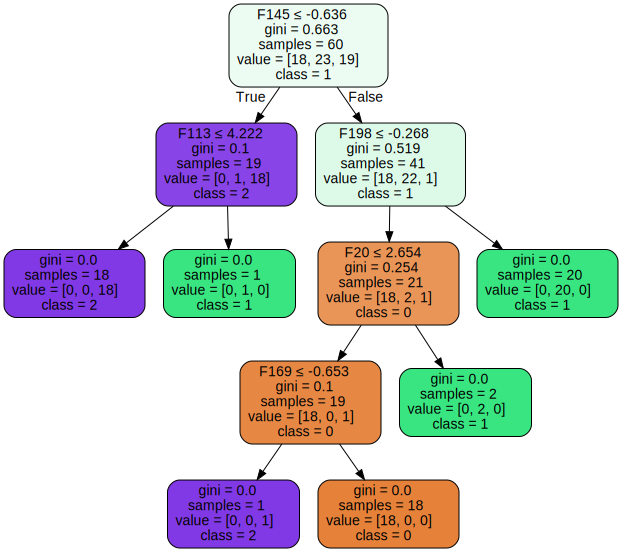

In [ ]:
# Addestro l'albero di decisione
clf = tree.DecisionTreeClassifier()#(max_depth=10)
clf = clf.fit(X_train, y_train)

# Eseguo il plot dell'albero di decisione creato
dot_data = tree.export_graphviz(clf, out_file=None,
    feature_names=reshaped_features_names,
    class_names=clustering_labels, #['Ugo', 'Federico', 'D.Va'],
    filled=True, rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Predico con l'albero di decisione
y_pred = clf.predict(X_test)
print("DT - Predictions:\n", y_pred)

DT - Predictions:
 [1 2 0 2 1 2 2 2 2 2 2 0 0 1 0 2 2 0 2 1 1 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2
 2 1 1 2 0 2 2 0 1 2 2 2 2 0 2 2 2 2 2 0 1 1 1 0 0 2 2 2 1 1 2 2 2 2 2 2 2
 0 1 0 2 0 2 2 2 2 2 2 0 2 1 2 1 0 2 2]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=81dda25b-3b1c-4959-acc8-4a8b980be717' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>